# Análisis de una solución de la ecuación del calor

La solución de la ecuación 
$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}$$
sujeta a las condiciones de frontera:
$$\frac{\partial u(0,t)}{\partial x}=\frac{\partial u(1,t)}{\partial x}=0, \;\;\; t>0$$
Y la condición inicial:
$$ \begin{equation} u(x,0) =
\left\{\begin{matrix}-2,\ si\ 0<x\le\frac{1}{2}\\0,\ si\ \frac{1}{2}<x<1\\\end{matrix}\right.
\end{equation} $$

Esta dada en términos de la serie de Fourier por la expresión:
$$u(x,t)=-1-\frac{4}{\pi}\sum_{n=1}^{\infty} \frac{sen(\frac{n \pi}{2})}{n}  \cos(n\pi x)e^{-(n\pi)^2 t}.$$

Este problema modela la transferencia de calor en una barra ideal delgada, con $k=1$.

In [ ]:
from pylab import *

Para empezar, graficamos la condición inicial.

In [ ]:
def recta(x):
    y = zeros(len(x))
    for i in range(len(x)):
        y[i] = -2
    return y

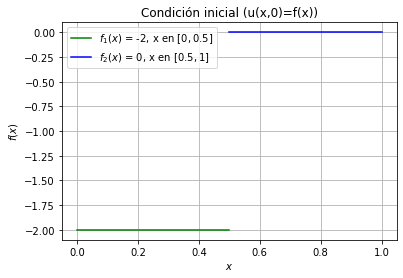

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
x = np.linspace(0,1,200)
x1 = np.linspace(0, 0.5,3)
x2 = np.linspace(0.5, 1,2)

plot(x1, [-2 for x in x1], 'g',label='$f_1(x)$ = -2, x en $[0, 0.5]$')
plot(x2, [0 for x in x2], 'b',label='$f_2(x)$ = 0, x en $[0.5, 1]$')

plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condición inicial (u(x,0)=f(x))"),grid(),legend()
show()

Usamos una serie de Fourier para aproximar la condición inicial $u(x,0)=f(x)=\left\{\begin{matrix}-2,\ si\ 0<x\le\frac{1}{2}\\0,\ si\ \frac{1}{2}<x<1\\\end{matrix}\right.$.

In [ ]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += (sin((n*pi)/(2))*cos(n*pi*x))/(n)
    return (-1.0-(4.0/pi)*f)

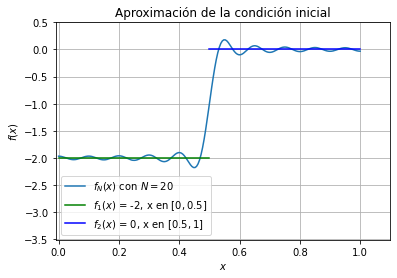

In [ ]:
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=20$')

plot(x1, [-2 for x in x1], 'g',label='$f_1(x)$ = -2, x en $[0, 0.5]$')
plot(x2, [0 for x in x2], 'b',label='$f_2(x)$ = 0, x en $[0.5, 1]$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-3.51,0.5]),grid(),legend()
show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

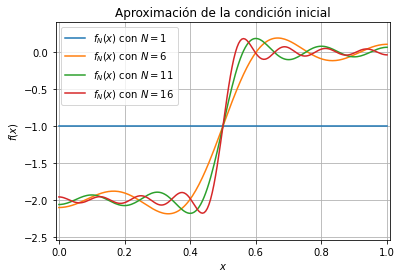

In [ ]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-2.54,0.4]),grid(),legend()
show()

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $t=0$.

In [ ]:
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += (sin((n*pi)/(2))*cos(n*pi*x))/(n)*exp(-n**2*pi**2*t[i])
    return (-1.0-(4.0/pi)*f)

In [ ]:
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

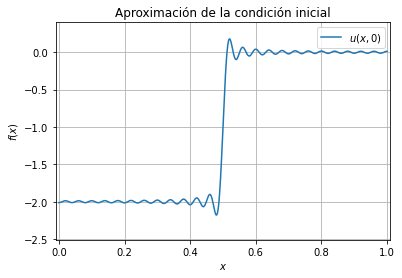

In [ ]:
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-2.51,0.4]),grid(),legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \to \infty$.

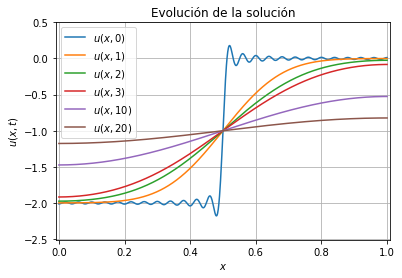

In [ ]:
plot(x,U[:,0],label='$u(x,0)$') 
plot(x,U[:,1],label='$u(x,1)$')
plot(x,U[:,2],label='$u(x,2)$')
plot(x,U[:,3],label='$u(x,3)$')
plot(x,U[:,10],label='$u(x,10)$')
plot(x,U[:,20],label='$u(x,20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-2.51,0.5]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

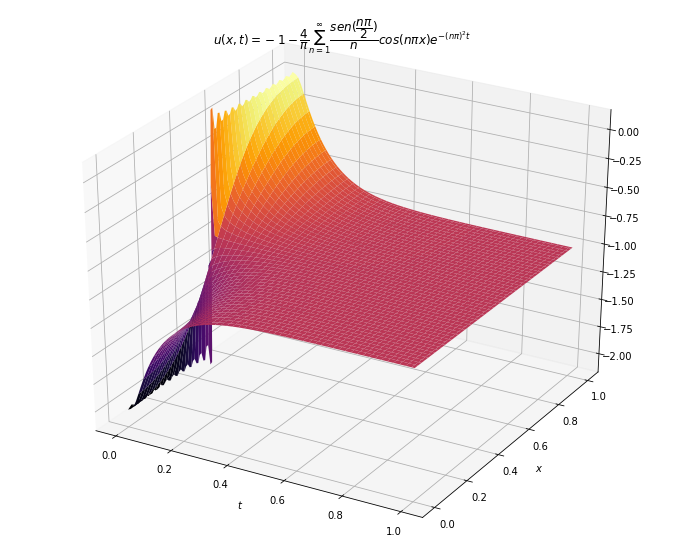

In [ ]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$'); 
plt.title('$u(x,t)=-1-\dfrac{4}{\pi}\sum_{n=1}^{\infty}\dfrac{sen(\dfrac{n \pi}{2})}{n}cos(n\pi x)e^{-(n\pi)^2t}$')
ax.plot_surface(X, T, U, cmap="inferno");